In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from scipy.stats import wilcoxon
from sklearn.metrics import confusion_matrix

In [3]:
mu1 = (3, 0,0)
sigma1 = [[0, 1, 1],[1, 0, 2],[1,2,1]]
mu2 = (0, 2,0)
sigma2 = [[1, 0, 1],[1, 1, 2],[0,2,1]]
mu3= (0,0, 2)
sigma3 = [[1, 1, 0],[1, 1, 2],[1,0,1]]
mu4=(1,1,1)
sigma4 = [[1, 1, 1],[0, 1, 2],[1,2,0]]
sigma1 = np.array(sigma1)
sigma1 = np.dot(sigma1, sigma1.T)
print(sigma1)
sigma2 = np.array(sigma2)
sigma2 = np.dot(sigma2, sigma2.T)
print(sigma2)
sigma3 = np.array(sigma3)
sigma3 = np.dot(sigma3, sigma3.T)
print(sigma3)
sigma4 = np.array(sigma4)
sigma4 = np.dot(sigma4, sigma4.T)
print(sigma4)

[[2 2 3]
 [2 5 3]
 [3 3 6]]
[[2 3 1]
 [3 6 4]
 [1 4 5]]
[[2 2 1]
 [2 6 3]
 [1 3 2]]
[[3 3 3]
 [3 5 2]
 [3 2 5]]


In [4]:
def generateData():
  data=[]
  #generate d100
  datatrain100=[]
  for i in range (100):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.25):
      value = np.random.multivariate_normal(mu1,sigma1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(1)
      datatrain100.append(ele)
    elif(labeltogenerate > 0.25 and labeltogenerate <=0.5):
      value = np.random.multivariate_normal(mu2,sigma2,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(2)
      datatrain100.append(ele)
    elif(labeltogenerate > 0.50 and labeltogenerate <=0.75):
      value = np.random.multivariate_normal(mu3,sigma3,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(3)
      datatrain100.append(ele)
    else:
      value = np.random.multivariate_normal(mu4,sigma4,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(4)
      datatrain100.append(ele)
  df100 = pd.DataFrame(datatrain100, columns = ['x1', 'x2', 'x3','label'])
  print(df100.head())
  print(df100.shape)

  #generate d200
  datatrain200=[]
  for i in range (200):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.25):
      value = np.random.multivariate_normal(mu1,sigma1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(1)
      datatrain200.append(ele)
    elif(labeltogenerate > 0.25 and labeltogenerate <=0.5):
      value = np.random.multivariate_normal(mu2,sigma2,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(2)
      datatrain200.append(ele)
    elif(labeltogenerate > 0.50 and labeltogenerate <=0.75):
      value = np.random.multivariate_normal(mu3,sigma3,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(3)
      datatrain200.append(ele)
    else:
      value = np.random.multivariate_normal(mu4,sigma4,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(4)
      datatrain200.append(ele)
  df200 = pd.DataFrame(datatrain200, columns = ['x1', 'x2', 'x3','label'])
  print(df200.head())
  print(df200.shape)

  #generate d500
  datatrain500=[]
  for i in range (500):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.25):
      value = np.random.multivariate_normal(mu1,sigma1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(1)
      datatrain500.append(ele)
    elif(labeltogenerate > 0.25 and labeltogenerate <=0.5):
      value = np.random.multivariate_normal(mu2,sigma2,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(2)
      datatrain500.append(ele)
    elif(labeltogenerate > 0.50 and labeltogenerate <=0.75):
      value = np.random.multivariate_normal(mu3,sigma3,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(3)
      datatrain500.append(ele)
    else:
      value = np.random.multivariate_normal(mu4,sigma4,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(4)
      datatrain500.append(ele)
  df500 = pd.DataFrame(datatrain500, columns = ['x1', 'x2', 'x3','label'])
  print(df500.head())
  print(df500.shape)

  #generate d1K
  datatrain1K=[]
  for i in range (1000):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.25):
      value = np.random.multivariate_normal(mu1,sigma1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(1)
      datatrain1K.append(ele)
    elif(labeltogenerate > 0.25 and labeltogenerate <=0.5):
      value = np.random.multivariate_normal(mu2,sigma2,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(2)
      datatrain1K.append(ele)
    elif(labeltogenerate > 0.50 and labeltogenerate <=0.75):
      value = np.random.multivariate_normal(mu3,sigma3,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(3)
      datatrain1K.append(ele)
    else:
      value = np.random.multivariate_normal(mu4,sigma4,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(4)
      datatrain1K.append(ele)
  df1K = pd.DataFrame(datatrain1K, columns = ['x1', 'x2', 'x3','label'])
  print(df1K.head())
  print(df1K.shape)

  #generate d2K
  datatrain2K=[]
  for i in range (2000):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.25):
      value = np.random.multivariate_normal(mu1,sigma1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(1)
      datatrain2K.append(ele)
    elif(labeltogenerate > 0.25 and labeltogenerate <=0.5):
      value = np.random.multivariate_normal(mu2,sigma2,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(2)
      datatrain2K.append(ele)
    elif(labeltogenerate > 0.50 and labeltogenerate <=0.75):
      value = np.random.multivariate_normal(mu3,sigma3,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(3)
      datatrain2K.append(ele)
    else:
      value = np.random.multivariate_normal(mu4,sigma4,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(4)
      datatrain2K.append(ele)
  df2K = pd.DataFrame(datatrain2K, columns = ['x1', 'x2', 'x3','label'])
  print(df2K.head())
  print(df2K.shape)
  
  #generate d5K
  datatrain5K=[]
  for i in range (5000):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.25):
      value = np.random.multivariate_normal(mu1,sigma1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(1)
      datatrain5K.append(ele)
    elif(labeltogenerate > 0.25 and labeltogenerate <=0.5):
      value = np.random.multivariate_normal(mu2,sigma2,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(2)
      datatrain5K.append(ele)
    elif(labeltogenerate > 0.50 and labeltogenerate <=0.75):
      value = np.random.multivariate_normal(mu3,sigma3,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(3)
      datatrain5K.append(ele)
    else:
      value = np.random.multivariate_normal(mu4,sigma4,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(4)
      datatrain5K.append(ele)
  df5K = pd.DataFrame(datatrain5K, columns = ['x1', 'x2', 'x3','label'])
  print(df5K.head())
  print(df5K.shape)

  #generate d100K
  datatrain100K=[]
  for i in range (100000):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.25):
      value = np.random.multivariate_normal(mu1,sigma1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(1)
      datatrain100K.append(ele)
    elif(labeltogenerate > 0.25 and labeltogenerate <=0.5):
      value = np.random.multivariate_normal(mu2,sigma2,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(2)
      datatrain100K.append(ele)
    elif(labeltogenerate > 0.50 and labeltogenerate <=0.75):
      value = np.random.multivariate_normal(mu3,sigma3,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(3)
      datatrain100K.append(ele)
    else:
      value = np.random.multivariate_normal(mu4,sigma4,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(4)
      datatrain100K.append(ele)
  df100K = pd.DataFrame(datatrain100K, columns = ['x1', 'x2', 'x3','label'])
  print(df100K.head())
  print(df100K.shape)
  data.append(df100)
  data.append(df200)
  data.append(df500)
  data.append(df1K)
  data.append(df2K)
  data.append(df5K)
  data.append(df100K)
  return data

In [5]:
data = generateData()

         x1        x2        x3  label
0  3.785016  0.901610  1.027618      1
1 -1.540591 -0.651087 -1.713271      2
2 -0.274799  1.554975  3.370211      3
3 -0.140136  0.786072  1.793159      3
4  1.083071  0.743230  1.206092      3
(100, 4)
         x1        x2        x3  label
0 -1.579833 -2.478700 -1.043302      4
1 -2.535281 -3.024042  0.340652      3
2  1.438947  1.416801  1.603839      4
3  2.208738  2.143644  1.249925      4
4 -0.707673  1.308586 -1.093152      2
(200, 4)
         x1        x2        x3  label
0  0.311043  4.820484  2.754560      2
1  2.441084  2.763913  2.015739      4
2  3.086423 -0.150574 -0.434094      1
3  1.041015  1.945609  0.559807      4
4  2.461516 -2.948665 -1.615233      1
(500, 4)
         x1        x2        x3  label
0  0.014953  0.877173 -1.275336      2
1  6.589527  4.201525  7.737079      1
2  0.089453  2.047825 -0.090842      2
3 -1.306606 -1.492896  2.705382      3
4 -0.336146  1.820337 -1.398394      4
(1000, 4)
         x1        x2      

In [6]:
df=data[6]
labels = df['label'].to_numpy()
dataonly = df.drop(['label'], axis =1)
X = dataonly.to_numpy()
print(X.shape)
print(multivariate_normal.pdf(X[0], mu1, sigma1)*0.25)
print(multivariate_normal.pdf(X[0], mu2, sigma2)*0.25)
print(multivariate_normal.pdf(X[0], mu3, sigma3)*0.25)
print(multivariate_normal.pdf(X[0], mu4, sigma4)*0.25)

(100000, 3)
1.463557148060342e-10
3.6393568451802967e-40
0.003970901361167789
0.0010787959622374972


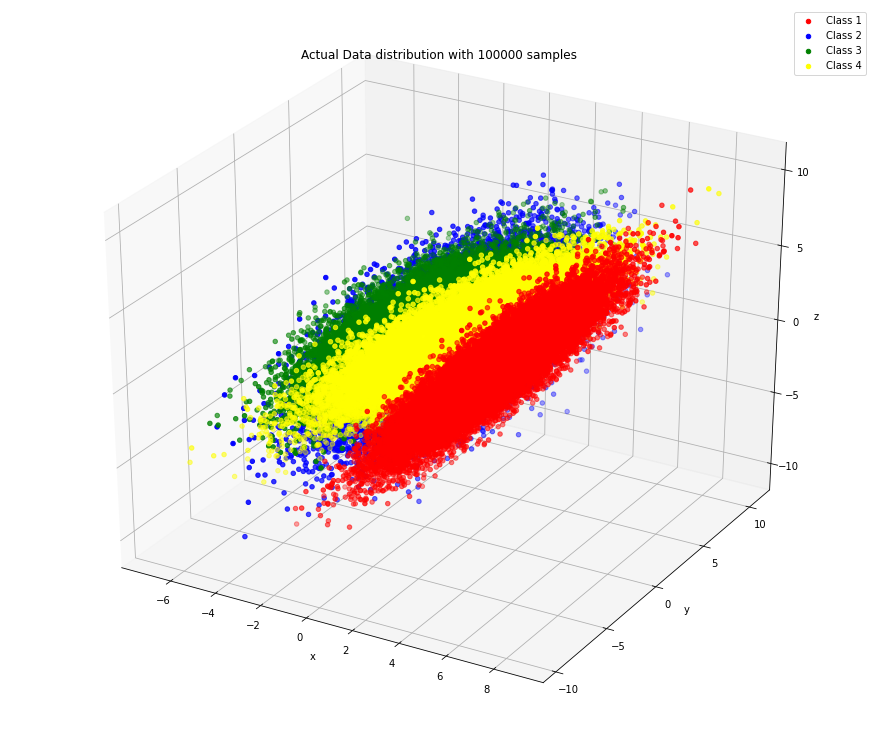

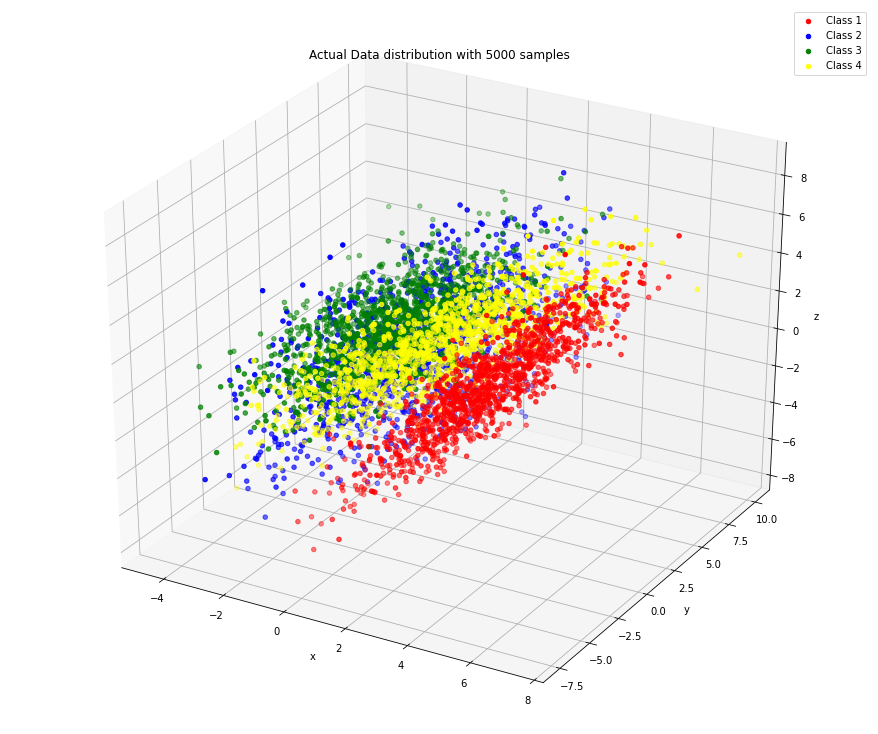

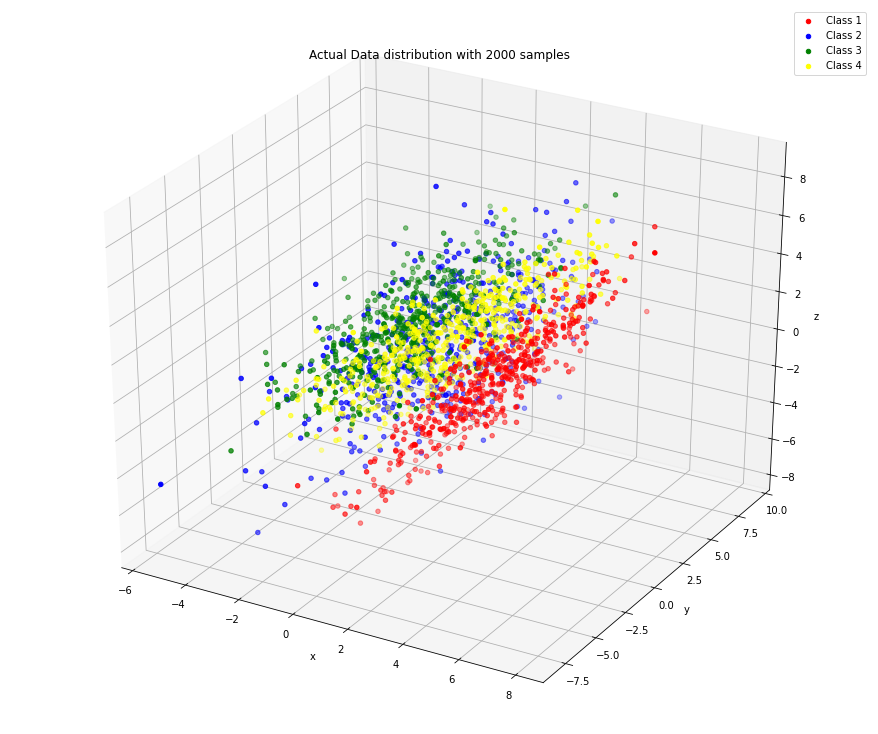

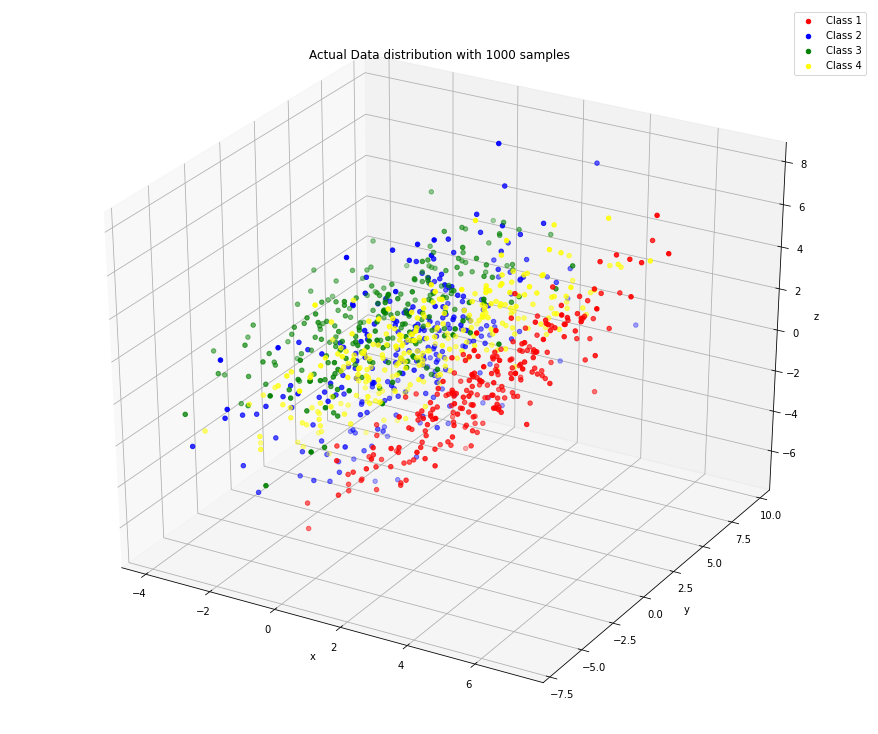

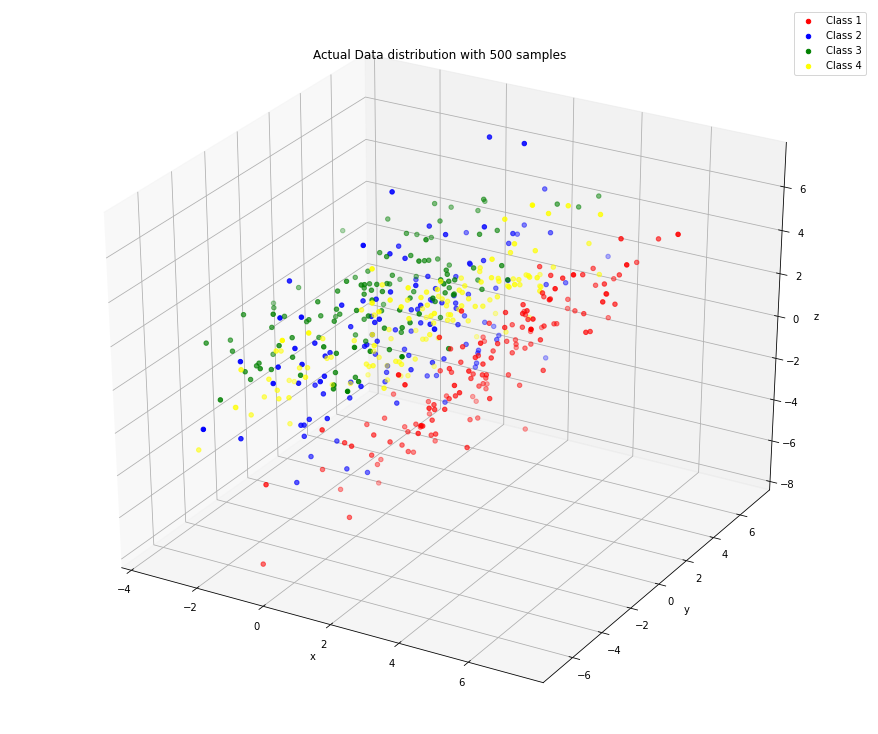

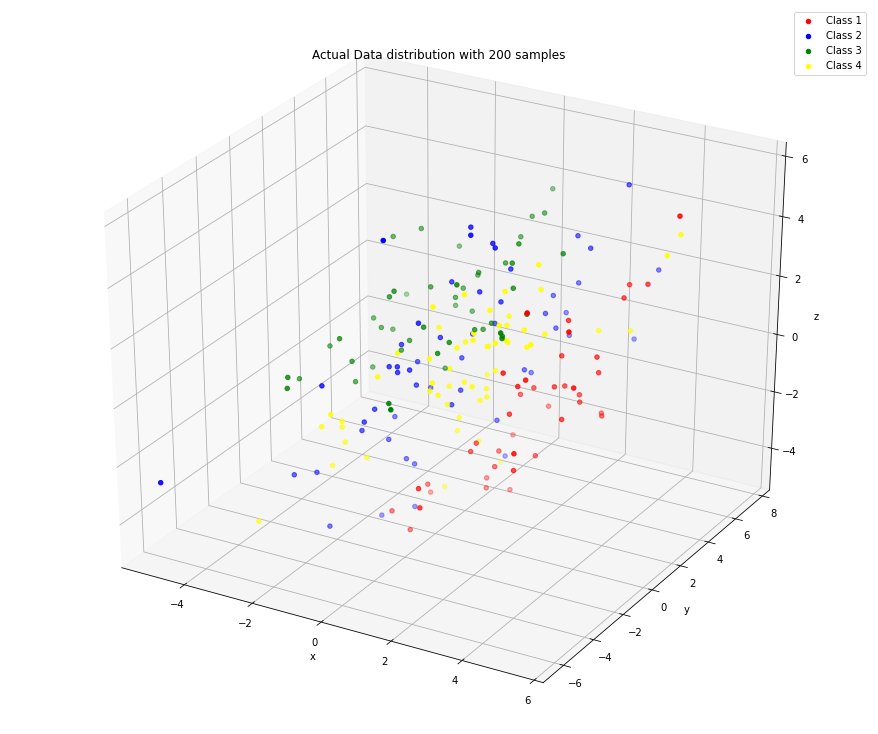

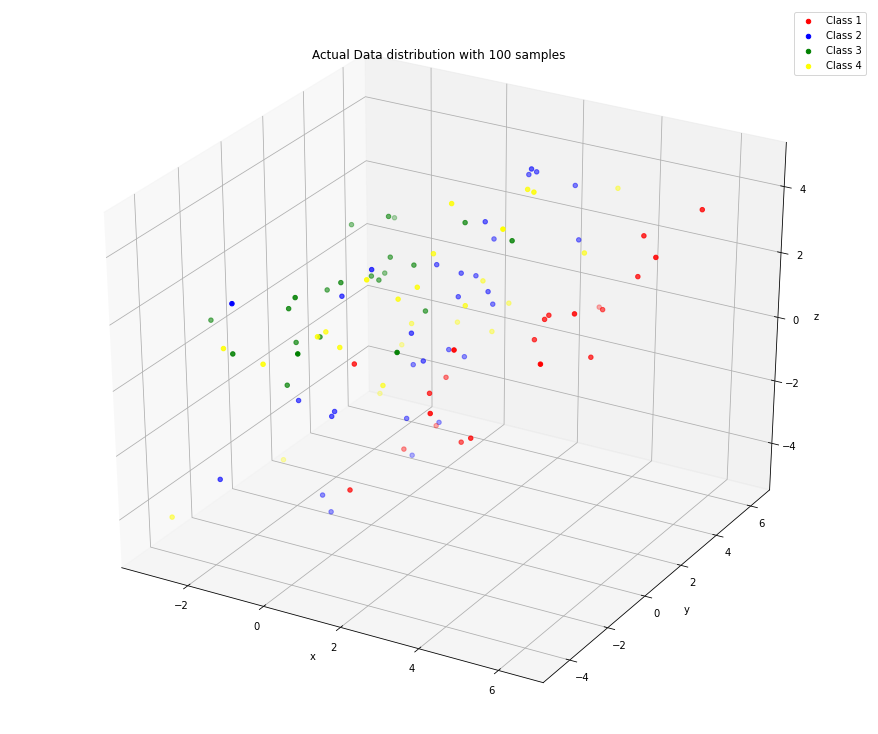

In [60]:
# Plot the actual data distribution
def plotData(df):
  x0 = [i for i in range(df.shape[0]) if (df.label[i] == 1)]
  x1 = [i for i in range(df.shape[0]) if (df.label[i] == 2 )]
  x2 = [i for i in range(df.shape[0]) if (df.label[i] == 3 )]
  x3 = [i for i in range(df.shape[0]) if (df.label[i] == 4 )]
  fig = plt.figure(figsize=(12,10))
  ax = Axes3D(fig)
  ax.scatter(df.x1[x0],df.x2[x0],df.x3[x0],'+',color ='red')
  ax.scatter(df.x1[x1],df.x2[x1],df.x3[x1],'.',color = 'blue')
  ax.scatter(df.x1[x2],df.x2[x2],df.x3[x2],'*',color = 'green')
  ax.scatter(df.x1[x3],df.x2[x3],df.x3[x3],'*',color = 'yellow')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.title("Actual Data distribution with {} samples".format(df.shape[0]))
  plt.legend(['Class 1','Class 2', 'Class 3', 'Class 4'])
  plt.show()
plotData(data[6])
plotData(data[5])
plotData(data[4])
plotData(data[3])
plotData(data[2])
plotData(data[1])
plotData(data[0])

In [65]:
# theoretically optimal classifier with min. error
def theoreticalEstimateError(df):
  labels = df['label'].to_numpy()
  dataonly = df.drop(['label'], axis =1)
  X = dataonly.to_numpy()
  lossMartix = [[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]]
  decisions=[]
  c1=[]
  ic12=[]
  ic13=[]
  ic14=[]
  c2=[]
  ic21=[]
  ic23=[]
  ic24=[]
  c3=[]
  ic31=[]
  ic32=[]
  ic34=[]
  c4=[]
  ic41=[]
  ic42=[]
  ic43=[]
  for i in range(X.shape[0]):
    ans=[]
    px1 = multivariate_normal.pdf(X[i], mu1, sigma1)*0.25
    px2 = multivariate_normal.pdf(X[i], mu2, sigma2)*0.25
    px3 = multivariate_normal.pdf(X[i], mu3, sigma3)*0.25
    px4 = multivariate_normal.pdf(X[i], mu4, sigma4)*0.25
    d1 = px2+px3+px4
    ans.append(d1)
    d2 = px1+px3+px4
    ans.append(d2)
    d3 = px1+px2+px4
    ans.append(d3)
    d4 = px1+px2+px3
    ans.append(d4)
    decision = ans.index(min(ans))+1
    decisions.append(decision)

    if (decision ==1):
      if (labels[i]==1):
        c1.append(i)
      elif (labels[i]==2):
        ic12.append(i)
      elif (labels[i]==3):
        ic13.append(i)
      else:
        ic14.append(i)
    elif (decision ==2):
      if (labels[i]==1):
        ic21.append(i)
      elif (labels[i]==2):
        c2.append(i)
      else:
        ic23.append(i)
    elif (decision  ==3):
      if (labels[i]==1):
        ic31.append(i)
      elif (labels[i]==2):
        ic32.append(i)
      elif (labels[i]==3):
        c3.append(i)
      else:
        ic34.append(i)
    else:
      if (labels[i]==1):
        ic41.append(i)
      elif (labels[i]==2):
        ic42.append(i)
      elif (labels[i]==3):
        ic43.append(i)
      else:
        c4.append(i)
  fig = plt.figure(figsize=(15,12))
  ax = Axes3D(fig)
  ax.scatter(df.x1[c1],df.x2[c1],df.x3[c1],marker = '^',color ='green')
  ax.scatter(df.x1[ic12],df.x2[ic12],df.x3[ic12],marker = 'o',color ='red')
  ax.scatter(df.x1[ic13],df.x2[ic13],df.x3[ic13],marker = 's',color ='red')
  ax.scatter(df.x1[ic14],df.x2[ic14],df.x3[ic14],marker = '*',color ='red')
  ax.scatter(df.x1[c2],df.x2[c2],df.x3[c2],marker = 'o',color = 'green')
  ax.scatter(df.x1[ic21],df.x2[ic21],df.x3[ic21],marker = '^',color = 'red')
  ax.scatter(df.x1[ic23],df.x2[ic23],df.x3[ic23],marker = 's',color = 'red')
  ax.scatter(df.x1[ic24],df.x2[ic24],df.x3[ic24],marker = '*',color = 'red')
  ax.scatter(df.x1[c3],df.x2[c3],df.x3[c3],marker = 's',color = 'green')
  ax.scatter(df.x1[ic31],df.x2[ic31],df.x3[ic31],marker = '^',color = 'red')
  ax.scatter(df.x1[ic32],df.x2[ic32],df.x3[ic32],marker = 'o',color = 'red')
  ax.scatter(df.x1[ic34],df.x2[ic34],df.x3[ic34],marker = '*',color = 'red')
  ax.scatter(df.x1[c4],df.x2[c4],df.x3[c4],marker = '*',color = 'green')
  ax.scatter(df.x1[ic41],df.x2[ic41],df.x3[ic41],marker = '^',color = 'red')
  ax.scatter(df.x1[ic42],df.x2[ic42],df.x3[ic42],marker = 'o',color = 'red')
  ax.scatter(df.x1[ic43],df.x2[ic43],df.x3[ic43],marker = 's',color = 'red')
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('x3')
  plt.title("ERM Classifer Output for 0/1 loss")
  plt.legend(['Class 1 Correct','Class 2 Incorrectly classified as 1','Class 3 Incorrecty classified as 1', 'Class 4 Incorrecly classified as 1','Class 2 Correct','Class 1 Incorrecty classified as 2','Class 3 Incorrecty classified as 2',  'Class 4 Incorrecly classified as 2','Class 3 Correct','Class 1 Incorrecty classified as 3','Class 2 Incorrecty classified as 3' ,'Class 4 Incorrecly classified as 3','Class 4 Correct','Class 1 incorrectly classified as 4','Class 2 incorrectly classified as 4','Class 3 incorrecly classified as 4'])
  plt.show()
  npdecisions = np.array(decisions)
  result = (npdecisions==labels).astype(int)
  print(type(result))
  print("the accuracy of the optimal classifier is {}".format(np.sum(result)/(result.shape[0])))

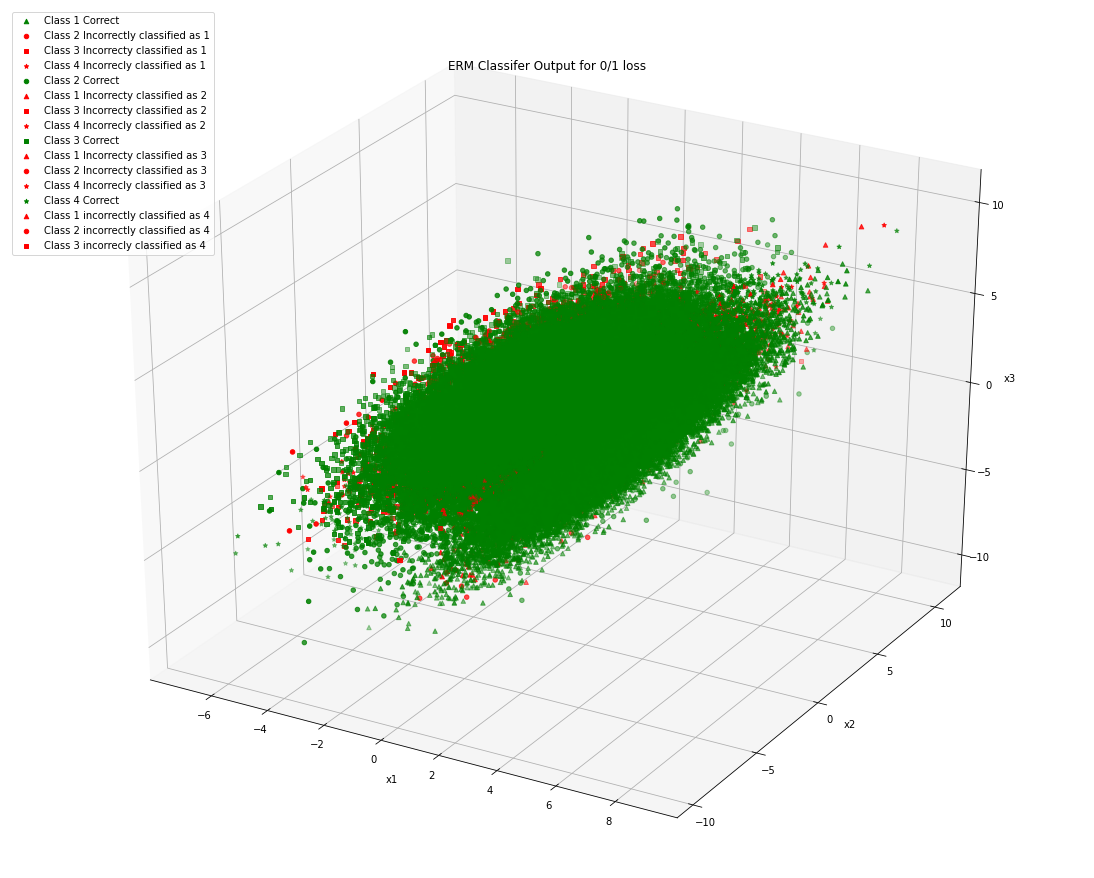

<class 'numpy.ndarray'>
the accuracy of the optimal classifier is 0.85979


In [66]:
theoreticalEstimateError(data[6])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


wilcoxon p-value between 1 & 2 perceptrons: 0.26144605232963014
wilcoxon p-value between 2 & 5 perceptrons: 0.2350444507531182
wilcoxon p-value between 5 & 10 perceptrons: 0.30458341467670014
wilcoxon p-value between 10 & 25 perceptrons: 0.017017372166933803
wilcoxon p-value between 25 & 50 perceptrons: 0.5743155189110907
wilcoxon p-value between 50 & 100 perceptrons: 0.018826058670236654
Results for 100 sample dataset with 1 perceptrons: 20.000000298023224 12.845232683069979
Results for 100 sample dataset with 2 perceptrons: 15.000000223517418 11.135529172606747
Results for 100 sample dataset with 5 perceptrons: 25.00000074505806 16.881943642828848
Results for 100 sample dataset with 10 perceptrons: 20.000000298023224 12.206555797625555
Results for 100 sample dataset with 25 perceptrons: 30.000001192092896 17.77638858818398
Results for 100 sample dataset with 50 perceptrons: 20.000000298023224 21.908902830717285
Results for 100 sample dataset with 100 perceptrons: 40.00000059604645 21

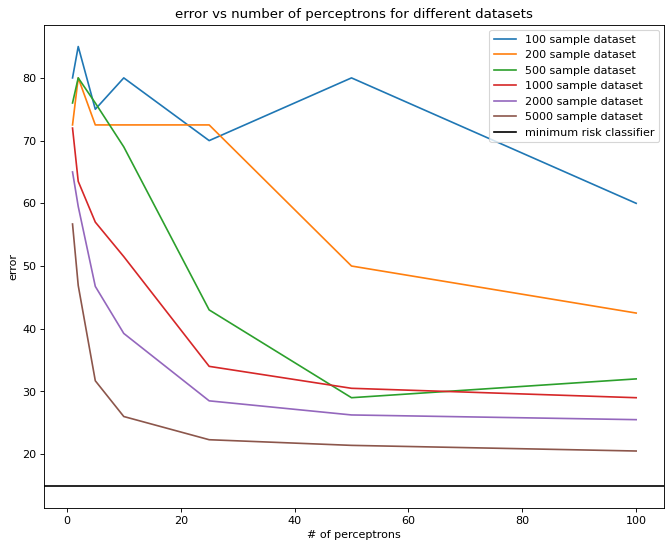

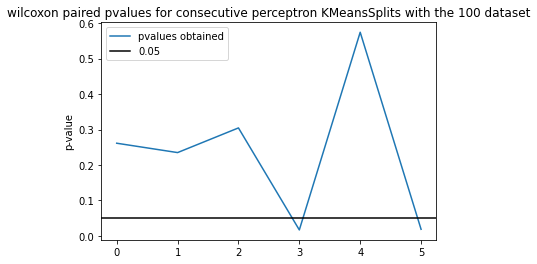

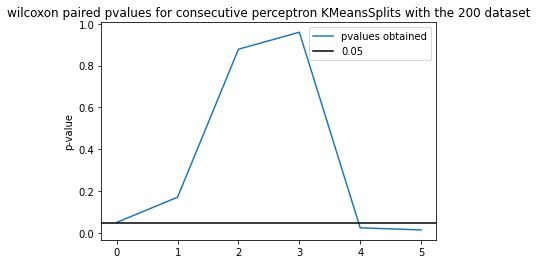

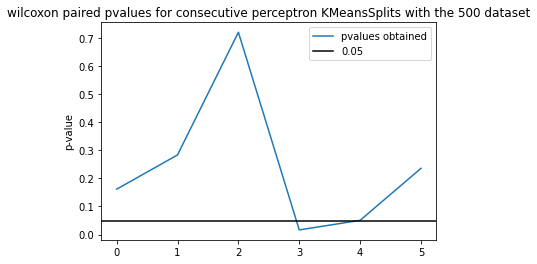

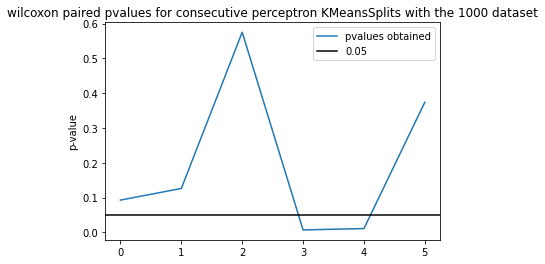

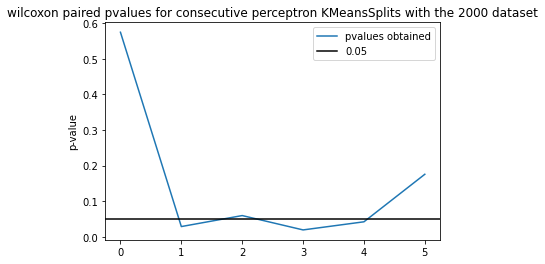

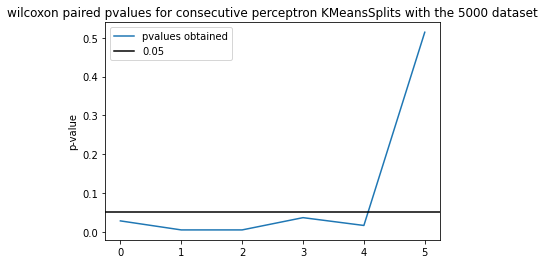

In [38]:
def kerasModel1():
  model = Sequential()
  model.add(Dense(1, input_dim=3, activation='elu'))
  model.add(Dense(4, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
def kerasModel2():
  model = Sequential()
  model.add(Dense(2, input_dim=3, activation='elu'))
  model.add(Dense(4, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
def kerasModel5():
  model = Sequential()
  model.add(Dense(5, input_dim=3, activation='elu'))
  model.add(Dense(4, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
def kerasModel10():
  model = Sequential()
  model.add(Dense(10, input_dim=3, activation='elu'))
  model.add(Dense(4, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
def kerasModel25():
  model = Sequential()
  model.add(Dense(25, input_dim=3, activation='elu'))
  model.add(Dense(4, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
def kerasModel50():
  model = Sequential()
  model.add(Dense(50, input_dim=3, activation='elu'))
  model.add(Dense(4, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
def kerasModel100():
  model = Sequential()
  model.add(Dense(100, input_dim=3, activation='elu'))
  model.add(Dense(4, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
X_100=[]
X_200=[]
X_500=[]
X_1000=[]
X_2000=[]
X_5000=[]
pvalueset=[]
perceptrons=[1,2,5,10,25,50,100]
for df in data[0:6]:
  labels = df['label'].to_numpy()
  dataonly = df.drop(['label'], axis =1)
  X = dataonly.to_numpy()
  encoder = LabelEncoder()
  encoder.fit(labels)
  encoded_labels = encoder.transform(labels)
  dummy_y = np_utils.to_categorical(encoded_labels)
  kfold = KFold(n_splits=10, shuffle=True,random_state=2)
  estimator1 = KerasClassifier(build_fn=kerasModel1, nb_epoch=200, batch_size=5,verbose=0)
  results1 = cross_val_score(estimator1, X, dummy_y, cv=kfold)
  estimator2 = KerasClassifier(build_fn=kerasModel2, nb_epoch=200, batch_size=5,verbose=0)
  results2 = cross_val_score(estimator2, X, dummy_y, cv=kfold)
  estimator5 = KerasClassifier(build_fn=kerasModel5, nb_epoch=200, batch_size=5,verbose=0)
  results5 = cross_val_score(estimator5, X, dummy_y, cv=kfold)
  estimator10 = KerasClassifier(build_fn=kerasModel10, nb_epoch=200, batch_size=5,verbose=0)
  results10 = cross_val_score(estimator10, X, dummy_y, cv=kfold)
  estimator25 = KerasClassifier(build_fn=kerasModel25, nb_epoch=200, batch_size=5,verbose=0)
  results25 = cross_val_score(estimator25, X, dummy_y, cv=kfold)
  estimator50 = KerasClassifier(build_fn=kerasModel50, nb_epoch=200, batch_size=5,verbose=0)
  results50 = cross_val_score(estimator50, X, dummy_y, cv=kfold)
  estimator100 = KerasClassifier(build_fn=kerasModel100, nb_epoch=200, batch_size=5,verbose=0)
  results100 = cross_val_score(estimator100, X, dummy_y, cv=kfold)
  w1,p1 = wilcoxon(results1,results2)
  print("wilcoxon p-value between 1 & 2 perceptrons: {}".format(p1))
  w2,p2 = wilcoxon(results2,results5)
  print("wilcoxon p-value between 2 & 5 perceptrons: {}".format(p2))
  w3,p3 = wilcoxon(results5,results10)
  print("wilcoxon p-value between 5 & 10 perceptrons: {}".format(p3))
  w4,p4 = wilcoxon(results10,results25)
  print("wilcoxon p-value between 10 & 25 perceptrons: {}".format(p4))
  w5,p5 = wilcoxon(results25,results50)
  print("wilcoxon p-value between 25 & 50 perceptrons: {}".format(p5))
  w6,p6 = wilcoxon(results50,results100)
  print("wilcoxon p-value between 50 & 100 perceptrons: {}".format(p6))
  pvalues=[p1,p2,p3,p4,p5,p6]
  pvalueset.append(pvalues)
  if(X.shape[0]==100):
    X_100.append(np.median(results1)*100)
    X_100.append(np.median(results2)*100)
    X_100.append(np.median(results5)*100)
    X_100.append(np.median(results10)*100)
    X_100.append(np.median(results25)*100)
    X_100.append(np.median(results50)*100)
    X_100.append(np.median(results100)*100)
  elif(X.shape[0]==200):
    X_200.append(np.median(results1)*100)
    X_200.append(np.median(results2)*100)
    X_200.append(np.median(results5)*100)
    X_200.append(np.median(results10)*100)
    X_200.append(np.median(results25)*100)
    X_200.append(np.median(results50)*100)
    X_200.append(np.median(results100)*100)
  elif(X.shape[0]==500):
    X_500.append(np.median(results1)*100)
    X_500.append(np.median(results2)*100)
    X_500.append(np.median(results5)*100)
    X_500.append(np.median(results10)*100)
    X_500.append(np.median(results25)*100)
    X_500.append(np.median(results50)*100)
    X_500.append(np.median(results100)*100)
  elif(X.shape[0]==1000):
    X_1000.append(np.median(results1)*100)
    X_1000.append(np.median(results2)*100)
    X_1000.append(np.median(results5)*100)
    X_1000.append(np.median(results10)*100)
    X_1000.append(np.median(results25)*100)
    X_1000.append(np.median(results50)*100)
    X_1000.append(np.median(results100)*100)
  elif(X.shape[0]==2000):
    X_2000.append(np.median(results1)*100)
    X_2000.append(np.median(results2)*100)
    X_2000.append(np.median(results5)*100)
    X_2000.append(np.median(results10)*100)
    X_2000.append(np.median(results25)*100)
    X_2000.append(np.median(results50)*100)
    X_2000.append(np.median(results100)*100)
  elif(X.shape[0]==5000):
    X_5000.append(np.median(results1)*100)
    X_5000.append(np.median(results2)*100)
    X_5000.append(np.median(results5)*100)
    X_5000.append(np.median(results10)*100)
    X_5000.append(np.median(results25)*100)
    X_5000.append(np.median(results50)*100)
    X_5000.append(np.median(results100)*100)
  print("Results for {} sample dataset with 1 perceptrons: {} {}" .format(X.shape[0], np.median(results1)*100, results1.std()*100))
  print("Results for {} sample dataset with 2 perceptrons: {} {}" .format(X.shape[0], np.median(results2)*100, results2.std()*100))
  print("Results for {} sample dataset with 5 perceptrons: {} {}" .format(X.shape[0], np.median(results5)*100, results5.std()*100))
  print("Results for {} sample dataset with 10 perceptrons: {} {}" .format(X.shape[0], np.median(results10)*100, results10.std()*100))
  print("Results for {} sample dataset with 25 perceptrons: {} {}" .format(X.shape[0], np.median(results25)*100, results25.std()*100))
  print("Results for {} sample dataset with 50 perceptrons: {} {}" .format(X.shape[0], np.median(results50)*100, results50.std()*100))
  print("Results for {} sample dataset with 100 perceptrons: {} {}" .format(X.shape[0], np.median(results100)*100, results100.std()*100))
figure(figsize=(10, 8), dpi=80)
X_100[:] = [abs(100-x) for x in X_100]
X_200[:] = [abs(100-x) for x in X_200]
X_500[:] = [abs(100-x) for x in X_500]
X_1000[:] = [abs(100-x) for x in X_1000]
X_2000[:] = [abs(100-x) for x in X_2000]
X_5000[:] = [abs(100-x) for x in X_5000]
plt.plot(perceptrons, X_100)
plt.plot(perceptrons, X_200)
plt.plot(perceptrons, X_500)
plt.plot(perceptrons, X_1000)
plt.plot(perceptrons, X_2000)
plt.plot(perceptrons, X_5000)
plt.axhline(y=100-85.05, color='black', linestyle='-')
plt.xlabel('# of perceptrons')
plt.ylabel('error')
plt.title('error vs number of perceptrons for different datasets')
plt.legend(['100 sample dataset','200 sample dataset', '500 sample dataset','1000 sample dataset','2000 sample dataset','5000 sample dataset','minimum risk classifier'])
plt.show()
datas=[100,200,500,1000,2000,5000]
index=0
for pvalue in pvalueset:
  figure(figsize=(10, 8), dpi=80)
  plt.plot(range(len(pvalue)), pvalue)
  plt.axhline(y=0.05, color='black', linestyle='-')
  plt.ylabel('p-value')
  plt.title('wilcoxon paired pvalues for consecutive perceptron KMeansSplits with the {} dataset'.format(datas[index]))
  plt.legend(['pvalues obtained','0.05'])
  plt.show()
  index+=1


In [39]:
test_errors=[]

In [40]:
# train 100 sample dataset
df=data[0]
labels = df['label'].to_numpy()
dataonly = df.drop(['label'], axis =1)
X = dataonly.to_numpy()
print(X.shape)
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
dummy_y = np_utils.to_categorical(encoded_labels)
print(dummy_y.shape)
estimator = kerasModel25()
estimator.fit(X,dummy_y,epochs=100,batch_size=5,verbose=1)
# on test data
df_test = data[6]
labels_test = df_test['label'].to_numpy()
dataonly_test = df_test.drop(['label'], axis =1)
X_test = dataonly_test.to_numpy()
print(X_test.shape)
encoder = LabelEncoder()
encoder.fit(labels_test)
encoded_labels_test = encoder.transform(labels_test)
dummy_y_test = np_utils.to_categorical(encoded_labels_test)
print(dummy_y_test.shape)
y_pred = estimator.predict(X_test)
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)+1
print(y_pred)
cm = confusion_matrix(y_pred, labels_test)
y_eval = estimator.evaluate(X_test,dummy_y_test)
print(cm)
print((1-y_eval[1])*100)
test_errors.append((1-y_eval[1])*100)

(100, 3)
(100, 4)
Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 1.4717 - accuracy: 0.3600
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 1.3075 - accuracy: 0.3800
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2004 - accuracy: 0.4200
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 1.1148 - accuracy: 0.5300
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0530 - accuracy: 0.5700
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9995 - accuracy: 0.6000
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9587 - accuracy: 0.6100
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9201 - accuracy: 0.6500
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8886 - accuracy: 0.6700
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.8610 - accuracy

In [41]:
# train 200 sample dataset
df=data[1]
print("Data with {} samples".format(df.shape[0]))
labels = df['label'].to_numpy()
dataonly = df.drop(['label'], axis =1)
X = dataonly.to_numpy()
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
dummy_y = np_utils.to_categorical(encoded_labels)
estimator = kerasModel50()
estimator.fit(X,dummy_y,epochs=100,batch_size=5,verbose=1)
# on test data
df_test = data[6]
labels_test = df_test['label'].to_numpy()
dataonly_test = df_test.drop(['label'], axis =1)
X_test = dataonly_test.to_numpy()
encoder = LabelEncoder()
encoder.fit(labels_test)
encoded_labels_test = encoder.transform(labels_test)
dummy_y_test = np_utils.to_categorical(encoded_labels_test)
y_pred = estimator.predict(X_test)
#print(y_pred)
y_pred = np.argmax(y_pred, axis=1)+1
#print(y_pred)
cm = confusion_matrix(y_pred, labels_test)
y_eval = estimator.evaluate(X_test,dummy_y_test)
print(cm)
print((1-y_eval[1])*100)
test_errors.append((1-y_eval[1])*100)

Data with 200 samples
Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 1.3100 - accuracy: 0.3650
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 1.0591 - accuracy: 0.5550
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.9339 - accuracy: 0.6200
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.8637 - accuracy: 0.6550
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.8150 - accuracy: 0.6800
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7799 - accuracy: 0.7100
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7535 - accuracy: 0.7050
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7257 - accuracy: 0.7150
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.7050
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6873 - accu

In [42]:
# train 500 sample dataset
df=data[2]
print("Data with {} samples".format(df.shape[0]))
labels = df['label'].to_numpy()
dataonly = df.drop(['label'], axis =1)
X = dataonly.to_numpy()
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
dummy_y = np_utils.to_categorical(encoded_labels)
estimator = kerasModel50()
estimator.fit(X,dummy_y,epochs=100,batch_size=5,verbose=1)
# on test data
df_test = data[6]
labels_test = df_test['label'].to_numpy()
dataonly_test = df_test.drop(['label'], axis =1)
X_test = dataonly_test.to_numpy()
encoder = LabelEncoder()
encoder.fit(labels_test)
encoded_labels_test = encoder.transform(labels_test)
dummy_y_test = np_utils.to_categorical(encoded_labels_test)
y_pred = estimator.predict(X_test)
#print(y_pred)
y_pred = np.argmax(y_pred, axis=1)+1
#print(y_pred)
cm = confusion_matrix(y_pred, labels_test)
y_eval = estimator.evaluate(X_test,dummy_y_test)
print(cm)
print((1-y_eval[1])*100)
test_errors.append((1-y_eval[1])*100)

Data with 500 samples
Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 1.3612 - accuracy: 0.3920
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 0.9013 - accuracy: 0.6800
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 0.7743 - accuracy: 0.7220
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 0.7071 - accuracy: 0.7420
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.7620
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.7740
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.7880
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.7720
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.7920
Epoch 10/100
100/100 [==============================] - 0s 1ms/step -

In [43]:
# train 1000 sample dataset
df=data[3]
print("Data with {} samples".format(df.shape[0]))
labels = df['label'].to_numpy()
dataonly = df.drop(['label'], axis =1)
X = dataonly.to_numpy()
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
dummy_y = np_utils.to_categorical(encoded_labels)
estimator = kerasModel50()
estimator.fit(X,dummy_y,epochs=100,batch_size=5,verbose=1)
# on test data
df_test = data[6]
labels_test = df_test['label'].to_numpy()
dataonly_test = df_test.drop(['label'], axis =1)
X_test = dataonly_test.to_numpy()
encoder = LabelEncoder()
encoder.fit(labels_test)
encoded_labels_test = encoder.transform(labels_test)
dummy_y_test = np_utils.to_categorical(encoded_labels_test)
y_pred = estimator.predict(X_test)
#print(y_pred)
y_pred = np.argmax(y_pred, axis=1)+1
#print(y_pred)
cm = confusion_matrix(y_pred, labels_test)
y_eval = estimator.evaluate(X_test,dummy_y_test)
print(cm)
print((1-y_eval[1])*100)
test_errors.append((1-y_eval[1])*100)

Data with 1000 samples
Epoch 1/100
200/200 [==============================] - 1s 1ms/step - loss: 1.0441 - accuracy: 0.5660
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.7487 - accuracy: 0.7160
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.7570
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.7640
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.7680
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.7730
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5592 - accuracy: 0.7790
Epoch 8/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5422 - accuracy: 0.7900
Epoch 9/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5362 - accuracy: 0.7800
Epoch 10/100
200/200 [==============================] - 0s 1ms/step 

In [44]:
# train 2000 sample dataset
df=data[4]
print("Data with {} samples".format(df.shape[0]))
labels = df['label'].to_numpy()
dataonly = df.drop(['label'], axis =1)
X = dataonly.to_numpy()
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
dummy_y = np_utils.to_categorical(encoded_labels)
estimator = kerasModel50()
estimator.fit(X,dummy_y,epochs=100,batch_size=5,verbose=1)
# on test data
df_test = data[6]
labels_test = df_test['label'].to_numpy()
dataonly_test = df_test.drop(['label'], axis =1)
X_test = dataonly_test.to_numpy()
encoder = LabelEncoder()
encoder.fit(labels_test)
encoded_labels_test = encoder.transform(labels_test)
dummy_y_test = np_utils.to_categorical(encoded_labels_test)
y_pred = estimator.predict(X_test)
#print(y_pred)
y_pred = np.argmax(y_pred, axis=1)+1
#print(y_pred)
cm = confusion_matrix(y_pred, labels_test)
y_eval = estimator.evaluate(X_test,dummy_y_test)
print(cm)
print((1-y_eval[1])*100)
test_errors.append((1-y_eval[1])*100)

Data with 2000 samples
Epoch 1/100
400/400 [==============================] - 1s 1ms/step - loss: 0.9341 - accuracy: 0.6200
Epoch 2/100
400/400 [==============================] - 1s 1ms/step - loss: 0.6433 - accuracy: 0.7590
Epoch 3/100
400/400 [==============================] - 1s 1ms/step - loss: 0.5835 - accuracy: 0.7795
Epoch 4/100
400/400 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7925
Epoch 5/100
400/400 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7975
Epoch 6/100
400/400 [==============================] - 1s 1ms/step - loss: 0.5219 - accuracy: 0.8000
Epoch 7/100
400/400 [==============================] - 1s 1ms/step - loss: 0.5104 - accuracy: 0.8055
Epoch 8/100
400/400 [==============================] - 1s 1ms/step - loss: 0.5000 - accuracy: 0.8060
Epoch 9/100
400/400 [==============================] - 1s 1ms/step - loss: 0.4884 - accuracy: 0.8135
Epoch 10/100
400/400 [==============================] - 1s 1ms/step 

In [45]:
# train 5000 sample dataset
df=data[5]
print("Data with {} samples".format(df.shape[0]))
labels = df['label'].to_numpy()
dataonly = df.drop(['label'], axis =1)
X = dataonly.to_numpy()
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
dummy_y = np_utils.to_categorical(encoded_labels)
estimator = kerasModel50()
estimator.fit(X,dummy_y,epochs=100,batch_size=5,verbose=1)
# on test data
df_test = data[6]
labels_test = df_test['label'].to_numpy()
dataonly_test = df_test.drop(['label'], axis =1)
X_test = dataonly_test.to_numpy()
encoder = LabelEncoder()
encoder.fit(labels_test)
encoded_labels_test = encoder.transform(labels_test)
dummy_y_test = np_utils.to_categorical(encoded_labels_test)
y_pred = estimator.predict(X_test)
#print(y_pred)
y_pred = np.argmax(y_pred, axis=1)+1
#print(y_pred)
cm = confusion_matrix(y_pred, labels_test)
y_eval = estimator.evaluate(X_test,dummy_y_test)
print(cm)
print((1-y_eval[1])*100)
test_errors.append((1-y_eval[1])*100)

Data with 5000 samples
Epoch 1/100
1000/1000 [==============================] - 2s 1ms/step - loss: 0.7024 - accuracy: 0.7310
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5211 - accuracy: 0.8000
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4771 - accuracy: 0.8094
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4488 - accuracy: 0.8118
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4311 - accuracy: 0.8210
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4166 - accuracy: 0.8238
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4096 - accuracy: 0.8222
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4030 - accuracy: 0.8246
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3972 - accuracy: 0.8258
Epoch 10/100
1000/1000 [==========================

In [49]:
datas

[100, 200, 500, 1000, 2000, 5000]

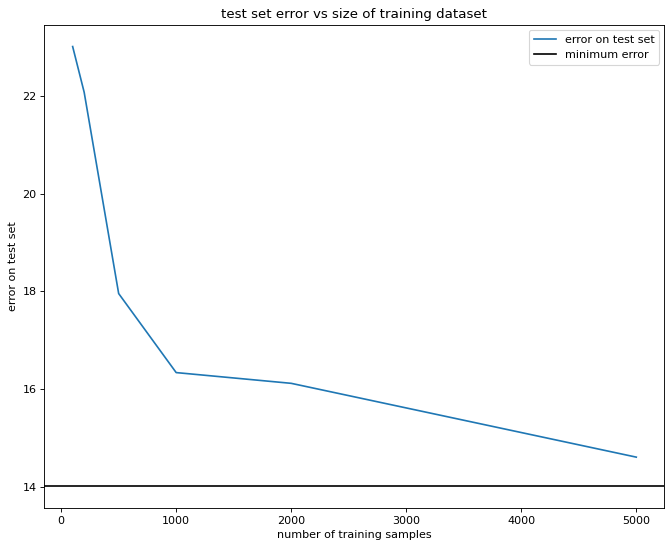

In [58]:
# plot perror vs dataset for the test set
figure(figsize=(10, 8), dpi=80)
plt.plot(datas,test_errors)
plt.ylabel('error on test set')
plt.axhline(y=100-85.98, color='black', linestyle='-')
plt.xlabel('number of training samples')
plt.title('test set error vs size of training dataset')
plt.legend(['error on test set','minimum error '])
plt.show()

In [56]:
logdatas

[2.0,
 2.3010299956639813,
 2.6989700043360187,
 3.0,
 3.3010299956639813,
 3.6989700043360187]

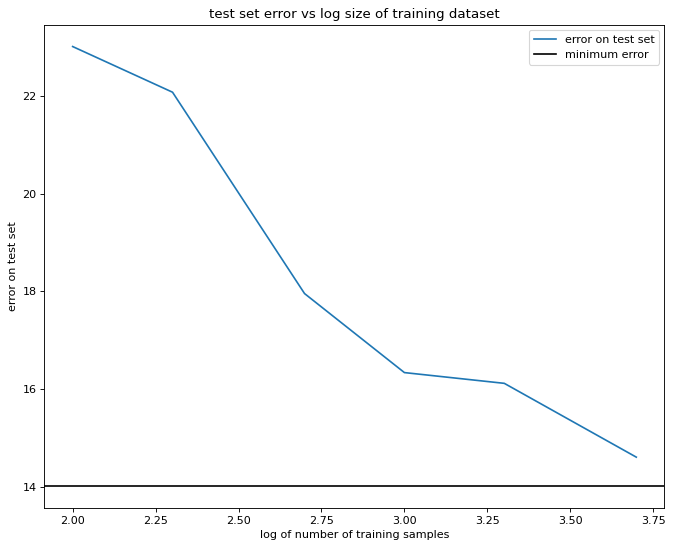

In [59]:
# plot perror vs log dataset for the test set
figure(figsize=(10, 8), dpi=80)
logdatas=[math.log10(x) for x in datas]
plt.plot(logdatas,test_errors)
plt.ylabel('error on test set')
plt.axhline(y=100-85.98, color='black', linestyle='-')
plt.xlabel('log of number of training samples')
plt.title('test set error vs log size of training dataset')
plt.legend(['error on test set','minimum error '])
plt.show()

##Q2

In [3]:
mean1 = (1, 0)
cov1 = [[1, -1],[0,1]]
mean2 = (0, 1)
cov2 = [[0,1],[1,1]]
mean3= (-1,0)
cov3 = [[1,0],[0,1]]
mean4=(0,-1)
cov4 = [[-1, 1],[1, -1]]
cov1 = np.array(cov1)
cov1 = np.dot(cov1, cov1.T)
cov2 = np.array(cov2)
cov2 = np.dot(cov2, cov2.T)
cov3 = np.array(cov3)
cov3 = np.dot(cov3, cov3.T)
cov4 = np.array(cov4)
cov4 = np.dot(cov4, cov4.T)
print(cov1)
print(cov2)
print(cov3)
print(cov4)

[[ 2 -1]
 [-1  1]]
[[1 1]
 [1 2]]
[[1 0]
 [0 1]]
[[ 2 -2]
 [-2  2]]


In [26]:
# generate data
def generateDataQ2():
  data=[]
  #generate d10
  datatrain10=[]
  for i in range (10):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.1):
      value = np.random.multivariate_normal(mean1,cov1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(1)
      datatrain10.append(ele)
    elif (labeltogenerate > 0.1 and labeltogenerate <=0.3):
      value = np.random.multivariate_normal(mean2,cov2,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(2)
      datatrain10.append(ele)
    elif(labeltogenerate >0.3 and labeltogenerate <=0.6):
      value = np.random.multivariate_normal(mean3,cov3,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(3)
      datatrain10.append(ele)
    else:
      value = np.random.multivariate_normal(mean4,cov4,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(4)
      datatrain10.append(ele)
  df10 = pd.DataFrame(datatrain10, columns = ['x', 'y', 'label'])
  #print(df10.head())
  #print(df10.shape)
  data.append(df10)
  #generate d100
  datatrain100=[]
  for i in range (100):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.1):
      value = np.random.multivariate_normal(mean1,cov1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(1)
      datatrain100.append(ele)
    elif (labeltogenerate > 0.1 and labeltogenerate <=0.3):
      value = np.random.multivariate_normal(mean2,cov2,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(2)
      datatrain100.append(ele)
    elif(labeltogenerate >0.3 and labeltogenerate <=0.6):
      value = np.random.multivariate_normal(mean3,cov3,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(3)
      datatrain100.append(ele)
    else:
      value = np.random.multivariate_normal(mean4,cov4,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(4)
      datatrain100.append(ele)
  df100 = pd.DataFrame(datatrain100, columns = ['x', 'y', 'label'])
  #print(df100.head())
  #print(df100.shape)
  data.append(df100)
  #generate d1000
  datatrain1000=[]
  for i in range (1000):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.1):
      value = np.random.multivariate_normal(mean1,cov1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(0)
      datatrain1000.append(ele)
    elif (labeltogenerate > 0.1 and labeltogenerate <=0.3):
      value = np.random.multivariate_normal(mean2,cov2,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(0)
      datatrain1000.append(ele)
    elif(labeltogenerate >0.3 and labeltogenerate <=0.6):
      value = np.random.multivariate_normal(mean3,cov3,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(0)
      datatrain1000.append(ele)
    else:
      value = np.random.multivariate_normal(mean4,cov4,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(0)
      datatrain1000.append(ele)
  df1000 = pd.DataFrame(datatrain1000, columns = ['x', 'y', 'label'])
  #print(df1000.head())
  #print(df1000.shape)
  data.append(df1000)
  #generate datatrain10000
  datatrain10000=[]
  for i in range (10000):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.1):
      value = np.random.multivariate_normal(mean1,cov1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(1)
      datatrain10000.append(ele)
    elif (labeltogenerate > 0.1 and labeltogenerate <=0.3):
      value = np.random.multivariate_normal(mean2,cov2,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(2)
      datatrain10000.append(ele)
    elif(labeltogenerate >0.3 and labeltogenerate <=0.6):
      value = np.random.multivariate_normal(mean3,cov3,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(3)
      datatrain10000.append(ele)
    else:
      value = np.random.multivariate_normal(mean4,cov4,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(4)
      datatrain10000.append(ele)
  df10000 = pd.DataFrame(datatrain10000, columns = ['x', 'y', 'label'])
  #print(df10000.head())
  #print(df10000.shape)
  data.append(df10000)
  return data

In [ ]:
'''acc1=[]
acc2=[]
acc3=[]
acc4=[]
acc5=[]
acc6=[]
for i in range(30):
  data=generateDataQ2()
  for df in data:
    train, val = train_test_split(df, test_size=0.1)
    trainlabels = train['label'].to_numpy()
    train = train.drop(['label'],axis=1)
    vallabels = val['label'].to_numpy()
    val = val.drop(['label'],axis=1)
    #gm1
    gm1 = GaussianMixture(n_components=1,random_state=0).fit(train)
    predict1 = gm1.predict(val) 
    npdecisions = np.array(predict1)
    result = (npdecisions==vallabels).astype(int)
    ans1 = np.sum(result)/(result.shape[0])
    acc1.append(ans1)
    print("the accuracy of gm1 on the {} sample data set is {} with n_component=1".format(df.shape[0],ans1))
    #gm2
    gm2 = GaussianMixture(n_components=2,random_state=0).fit(train)
    predict2 = gm2.predict(val) 
    npdecisions = np.array(predict2)
    result = (npdecisions==vallabels).astype(int)
    ans2 = np.sum(result)/(result.shape[0])
    acc2.append(ans2)
    print("the accuracy of gm2 on the {} sample data set is {} with n_component=2".format(df.shape[0],ans2))
    #gm3
    gm3 = GaussianMixture(n_components=3,random_state=0).fit(train)
    predict3 = gm3.predict(val) 
    npdecisions = np.array(predict3)
    result = (npdecisions==vallabels).astype(int)
    ans3 = np.sum(result)/(result.shape[0])
    acc3.append(ans3)
    print("the accuracy of gm3 on the {} sample data set is {} with n_component=3".format(df.shape[0],ans3))
    #gm4
    gm4 = GaussianMixture(n_components=4,random_state=0).fit(train)
    predict4 = gm4.predict(val) 
    npdecisions = np.array(predict4)
    result = (npdecisions==vallabels).astype(int)
    ans4 = np.sum(result)/(result.shape[0])
    acc4.append(ans4)
    print("the accuracy of gm1 on the {} sample data set is {} with n_component=4".format(df.shape[0],ans4))
    #gm5
    gm5 = GaussianMixture(n_components=5,random_state=0).fit(train)
    predict5 = gm5.predict(val) 
    npdecisions = np.array(predict5)
    result = (npdecisions==vallabels).astype(int)
    ans5 = np.sum(result)/(result.shape[0])
    acc5.append(ans5)
    print("the accuracy of gm5 on the {} sample data set is {} with n_component=5".format(df.shape[0],ans5))
    #gm6
    gm6 = GaussianMixture(n_components=6,random_state=0).fit(train)
    predict6 = gm6.predict(val) 
    npdecisions = np.array(predict6)
    result = (npdecisions==vallabels).astype(int)
    ans6 = np.sum(result)/(result.shape[0])
    acc6.append(ans6)
    print("the accuracy of gm6 on the {} sample data set is {} with n_component=6".format(df.shape[0],ans6))
  figure(figsize=(10, 8), dpi=80)
  plt.plot(range(30),acc1)
  plt.plot(range(30),acc2)
  plt.plot(range(30),acc3)
  plt.plot(range(30),acc4)
  plt.plot(range(30),acc5)
  plt.plot(range(30),acc6)
  plt.xlabel('iteration')
  plt.ylabel('accuracy')
  plt.title('accuracy with different gmms')
  plt.legend(['gmm1','gmm2', 'gmm3','gmm4','gmm5','gmm6'])
  plt.show()'''

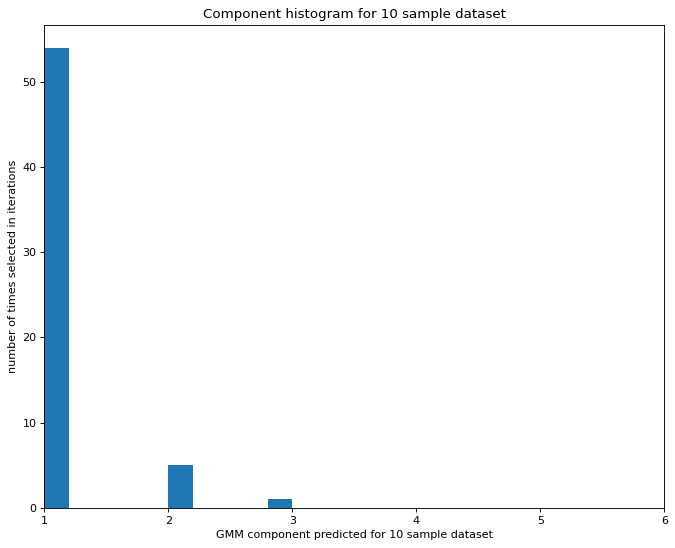

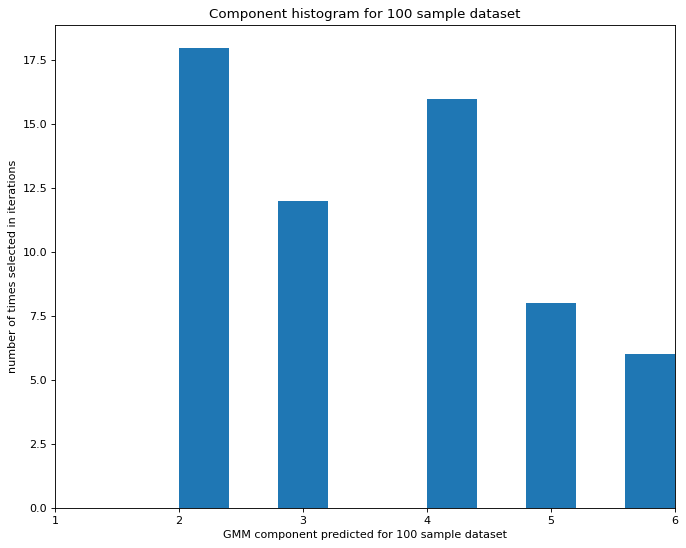

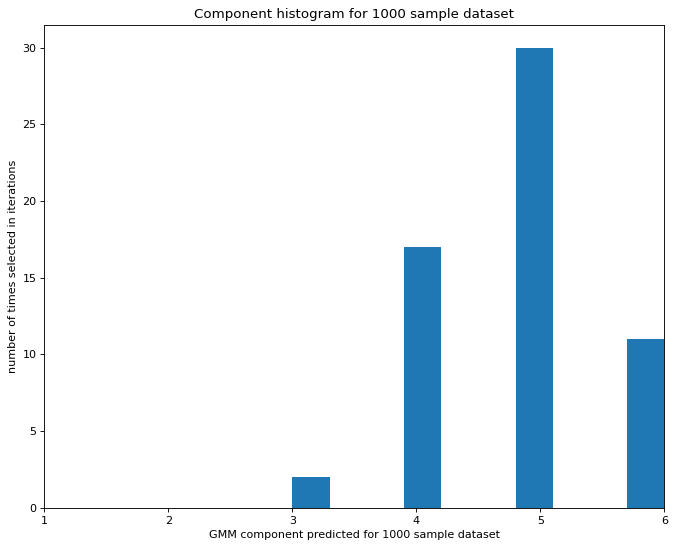

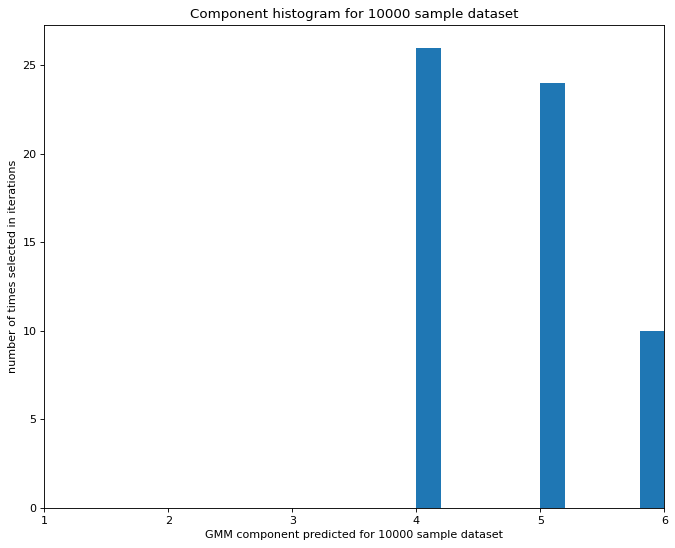

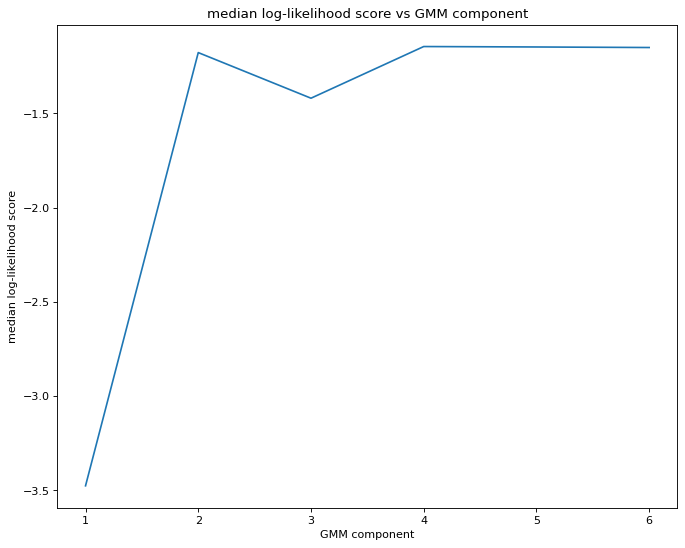

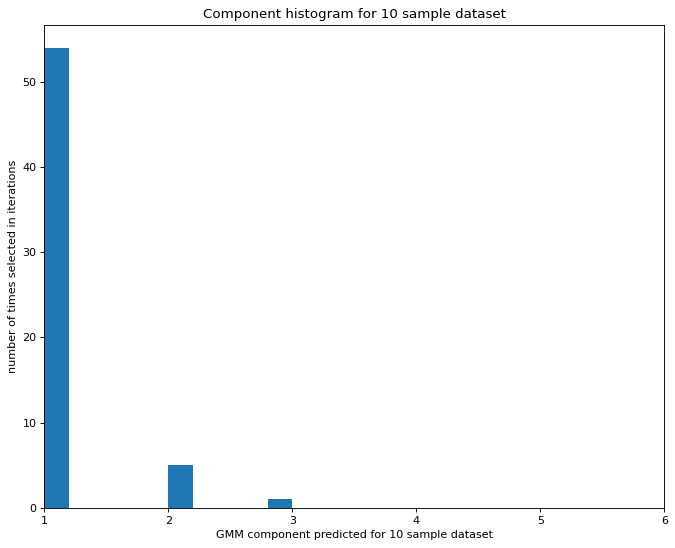

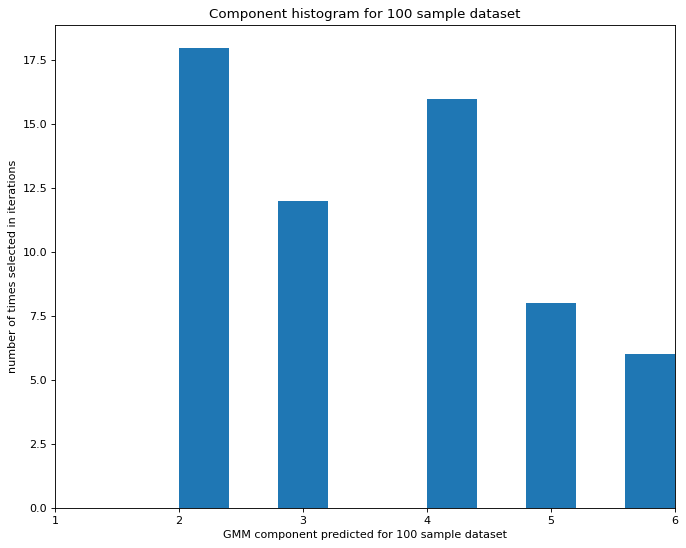

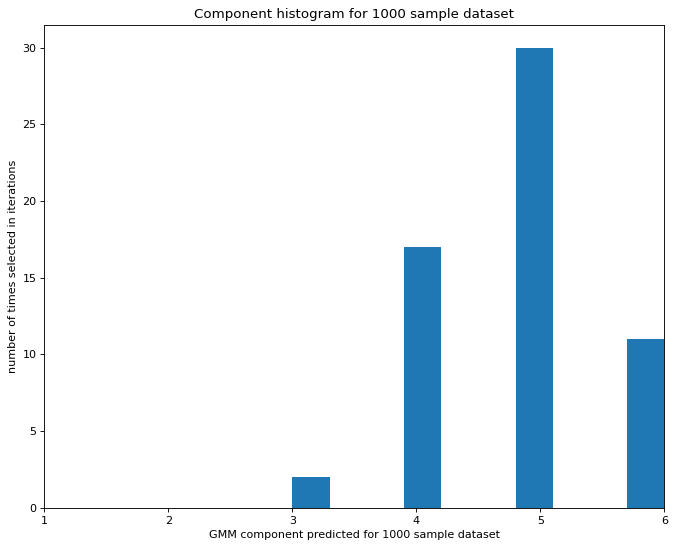

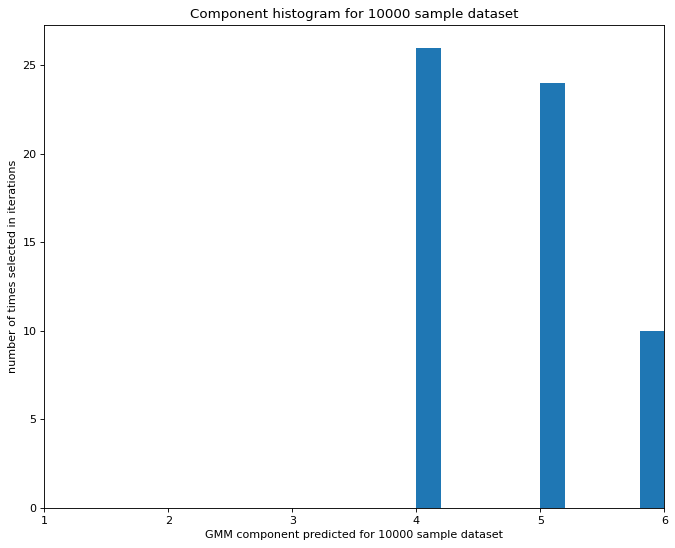

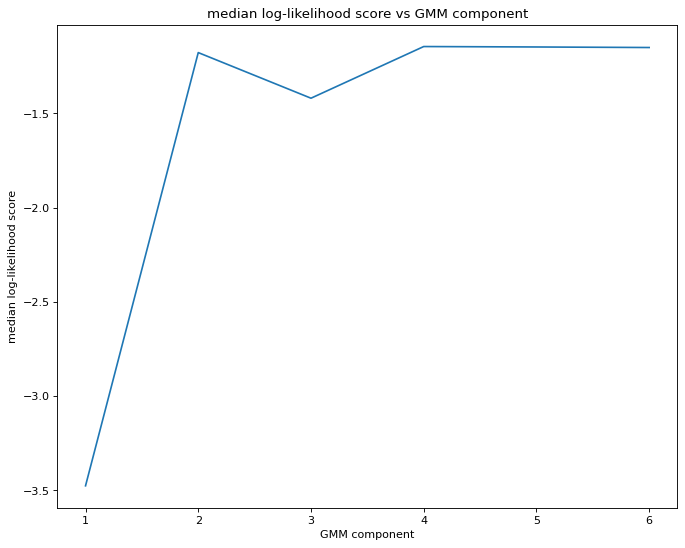

In [16]:
prob1=[]
prob2=[]
prob3=[]
prob4=[]
prob5=[]
prob6=[]
decision=[]
n=60
kfold = KFold(n_splits=10, shuffle=True)
for i in range(n):
  data=generateDataQ2()
  for df in data:
    prob=[]
    label = df['label'].to_numpy()
    X = df.drop(['label'],axis=1)
    #gm1
    gm1 = GaussianMixture(n_components=1,random_state=0)
    results1 = cross_val_score(gm1, X, label, cv=kfold)
    prob1.append(results1.mean())
    prob.append(results1.mean())
    #gm2
    gm2 = GaussianMixture(n_components=2,random_state=0)
    results2 = cross_val_score(gm2, X, label, cv=kfold)
    prob2.append(results2.mean())
    prob.append(results2.mean())
    #gm3
    gm3 = GaussianMixture(n_components=3,random_state=0)
    results3 = cross_val_score(gm3, X, label, cv=kfold)
    prob3.append(results3.mean())
    prob.append(results3.mean())
    #gm4
    gm4 = GaussianMixture(n_components=4,random_state=0)
    results4 = cross_val_score(gm4, X, label, cv=kfold)
    prob4.append(results4.mean())
    prob.append(results4.mean())
    #gm5
    gm5 = GaussianMixture(n_components=5,random_state=0)
    results5 = cross_val_score(gm5, X, label, cv=kfold)
    prob5.append(results5.mean())
    prob.append(results5.mean())
    #gm6
    gm6 = GaussianMixture(n_components=6,random_state=0)
    results6 = cross_val_score(gm6, X, label, cv=kfold)
    prob6.append(results6.mean())
    prob.append(results6.mean())
    decision.append(np.argmax(prob)+1)
#extract data sample wise results
decision10=[]
decision100=[]
decision1000=[]
decision10000=[]
prob101=[]
prob102=[]
prob103=[]
prob104=[]
prob105=[]
prob106=[]
prob1001=[]
prob1002=[]
prob1003=[]
prob1004=[]
prob1005=[]
prob1006=[]
prob10001=[]
prob10002=[]
prob10003=[]
prob10004=[]
prob10005=[]
prob10006=[]
prob100001=[]
prob100002=[]
prob100003=[]
prob100004=[]
prob100005=[]
prob100006=[]
for i in range(0,n*len(data),4):
  decision10.append(decision[i])
  decision100.append(decision[i+1])
  decision1000.append(decision[i+2])
  decision10000.append(decision[i+3])
  prob101.append(prob1[i])
  prob102.append(prob2[i])
  prob103.append(prob3[i])
  prob104.append(prob4[i])
  prob105.append(prob5[i])
  prob106.append(prob6[i])
  prob1001.append(prob1[i+1])
  prob1002.append(prob2[i+1])
  prob1003.append(prob3[i+1])
  prob1004.append(prob4[i+1])
  prob1005.append(prob5[i+1])
  prob1006.append(prob6[i+1])
  prob10001.append(prob1[i+2])
  prob10002.append(prob2[i+2])
  prob10003.append(prob3[i+2])
  prob10004.append(prob4[i+2])
  prob10005.append(prob5[i+2])
  prob10006.append(prob6[i+2])
  prob100001.append(prob1[i+3])
  prob100002.append(prob2[i+3])
  prob100003.append(prob3[i+3])
  prob100004.append(prob4[i+3])
  prob100005.append(prob5[i+3])
  prob100006.append(prob6[i+3])

figure(figsize=(10, 8), dpi=80)
plt.hist(decision10)
plt.xlim([1,6])
plt.xlabel('GMM component predicted for 10 sample dataset')
plt.ylabel('number of times selected in iterations')
plt.title('Component histogram for 10 sample dataset')

figure(figsize=(10, 8), dpi=80)
plt.hist(decision100)
plt.xlabel('GMM component predicted for 100 sample dataset')
plt.ylabel('number of times selected in iterations')
plt.title('Component histogram for 100 sample dataset')
plt.xlim([1,6])

figure(figsize=(10, 8), dpi=80)
plt.hist(decision1000)
plt.xlabel('GMM component predicted for 1000 sample dataset')
plt.ylabel('number of times selected in iterations')
plt.title('Component histogram for 1000 sample dataset')
plt.xlim([1,6])

figure(figsize=(10, 8), dpi=80)
plt.hist(decision10000)
plt.xlabel('GMM component predicted for 10000 sample dataset')
plt.ylabel('number of times selected in iterations')
plt.title('Component histogram for 10000 sample dataset')
plt.xlim([1,6])

prob1=np.array(prob1)
prob2=np.array(prob2)
prob3=np.array(prob3)
prob4=np.array(prob4)
prob5=np.array(prob5)
prob6=np.array(prob6)
figure(figsize=(10, 8), dpi=80)
prob1 = np.median(prob1)
prob2 = np.median(prob2)
prob3 = np.median(prob3)
prob4 = np.median(prob4)
prob5 = np.median(prob5)
prob6 = np.median(prob6)
prob_set=[prob1,prob2,prob3,prob4,prob5,prob6]
gmm_axis=[1+x for x in range(6)]
plt.plot(gmm_axis,prob_set)
plt.xlabel('GMM component')
plt.ylabel('median log-likelihood score')
plt.title('median log-likelihood score vs GMM component')
plt.show(())

In [8]:
gmm_axis=[1+x for x in range(6)]

In [9]:
gmm_axis

[1, 2, 3, 4, 5, 6]

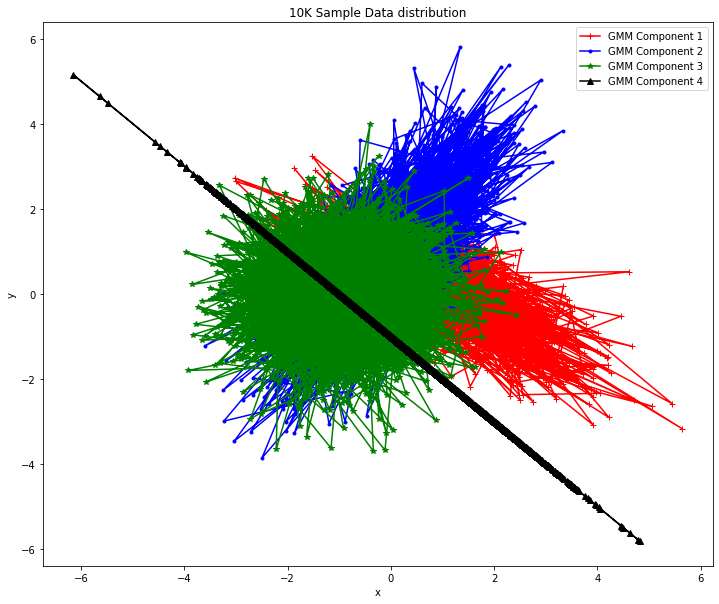

In [27]:
data=generateDataQ2()
df=data[3]
# Plot the actual data distribution
x0 = [i for i in range(df.shape[0]) if (df.label[i] == 1)]
x1 = [i for i in range(df.shape[0]) if (df.label[i] == 2 )]
x2 = [i for i in range(df.shape[0]) if (df.label[i] == 3 )]
x3 = [i for i in range(df.shape[0]) if (df.label[i] == 4 )]
fig = plt.figure(figsize=(12,10))
'''ax = Axes3D(fig)
ax.scatter(df.x[x0],df.y[x0],'+',color ='red')
ax.scatter(df.x[x1],df.y[x1],'.',color = 'blue')
ax.scatter(df.x[x2],df.y[x2],'*',color = 'green')
ax.scatter(df.x[x3],df.y[x3],'^',color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')'''
plt.plot(df.x[x0],df.y[x0], marker ='+',color='red')
plt.plot(df.x[x1],df.y[x1], marker='.',color='blue')
plt.plot(df.x[x2],df.y[x2], marker='*', color='green')
plt.plot(df.x[x3],df.y[x3], marker='^', color = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title("10K Sample Data distribution")
plt.legend(['GMM Component 1','GMM Component 2', 'GMM Component 3','GMM Component 4'])
plt.show()

In [20]:
data=generateDataQ2()
df=data[3]

In [21]:
df.head()

,x,y,label
0,1.367799,-0.858939,0
1,-1.221765,0.221765,0
2,-2.686423,-2.936082,0
3,-0.149219,-1.452574,0
4,-1.460170,-1.206136,0


In [24]:
x0 = [i for i in range(df.shape[0]) if (df.label[i] == 1)]

In [25]:
x0

[]